In [1]:
import ee
import geopandas as gpd
from shapely.geometry import mapping, shape
import osmnx as ox
import folium
import requests
from PIL import Image
import numpy as np

# Get Google AlphaEarth Data

In [2]:
ee.Authenticate()

True

In [3]:
ee.Initialize(project='crop-classification-467508')

<Axes: >

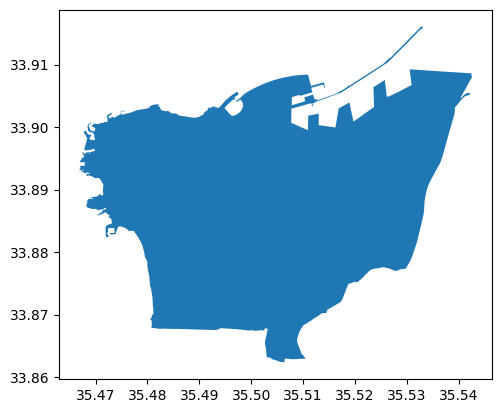

In [4]:
admin = ox.geocode_to_gdf('Beirut')
geom = admin.iloc[0].geometry
admin.plot()

# Convert the area into a region of interest in GEE

In [5]:
roi = ee.Geometry(mapping(geom))
print('ROI bounds:', roi.bounds().getInfo())

ROI bounds: {'geodesic': False, 'type': 'Polygon', 'coordinates': [[[35.466807, 33.862330899999975], [35.542581000000006, 33.862330899999975], [35.542581000000006, 33.91611280000002], [35.466807, 33.91611280000002], [35.466807, 33.862330899999975]]]}


# Load the AlphaEarth Dataset
64 bands - 10 m resolution

In [6]:
dataset = ee.ImageCollection("GOOGLE/SATELLITE_EMBEDDING/V1/ANNUAL")

In [7]:
img_2024 = (
    dataset
    .filterDate("2024-01-01", "2025-01-01")
    .filterBounds(roi)
    .mean()
    .clip(roi)
)

In [8]:
print(img_2024.bandNames().getInfo())

['A00', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60', 'A61', 'A62', 'A63']


In [9]:
vis_params = {"bands": ["A00", "A16", "A09"], "min":-0.3, "max":0.3}

thumb_params = {"region":roi,
                "dimensions":2048,
                "crs":"EPSG:23700",
                "format":"png", **vis_params}

url = img_2024.getThumbURL(thumb_params)
print("Thumbnail URL:", url)

response = requests.get(url, stream=True)
im = Image.open(response.raw).convert("RGB")
arr = np.array(im)
arr

Thumbnail URL: https://earthengine.googleapis.com/v1/projects/crop-classification-467508/thumbnails/0440bbae541271b2a323b1cae419af6e-90a7cbff31558343b9e488d299816625:getPixels


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

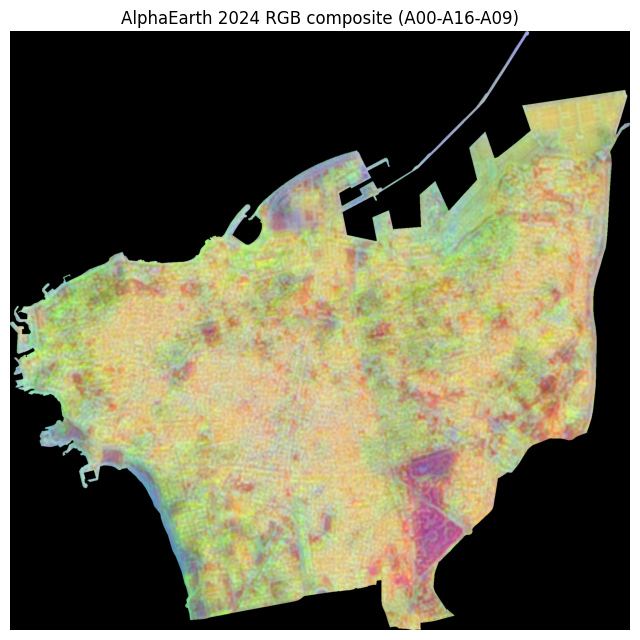

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(arr)
plt.title("AlphaEarth 2024 RGB composite (A00-A16-A09)")
plt.axis("off")
plt.show()

# Get Buildings from OSM

<Axes: >

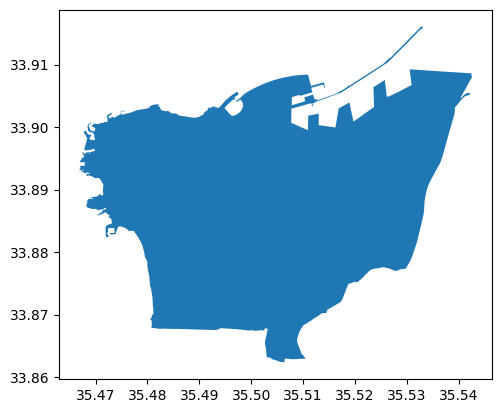

In [11]:
admin = ox.geocode_to_gdf("Beirut")
geom = admin.iloc[0].geometry
admin.plot()

In [17]:
buildings['amenity'].value_counts()

amenity
place_of_worship     118
restaurant            23
cafe                  16
bank                  11
school                 9
hospital               6
university             5
fuel                   5
pharmacy               4
fast_food              3
police                 3
theatre                1
bureau_de_change       1
studio                 1
conference_centre      1
bar                    1
car_wash               1
courthouse             1
clock                  1
community_centre       1
townhall               1
parking                1
cinema                 1
nightclub              1
library                1
arts_centre            1
USJ Rectorat           1
college                1
Name: count, dtype: int64

Number of buildings: 15864


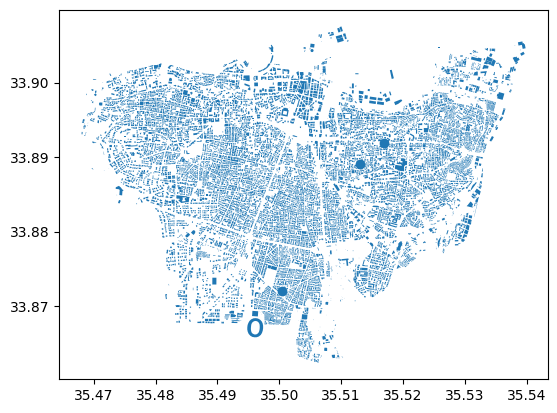

In [18]:
buildings = ox.features_from_polygon(geom, tags={'building':True})
buildings.plot()
print("Number of buildings:",len(buildings))

In [36]:
buildings

geometry  \
element  id                                                              
node     605502324                             POINT (35.50038 33.872)   
         1674857001                          POINT (35.51698 33.89182)   
         5285970524                          POINT (35.51302 33.88907)   
relation 71853       POLYGON ((35.48897 33.89467, 35.48893 33.89517...   
         4662424     MULTIPOLYGON (((35.4805 33.90205, 35.48053 33....   
...                                                                ...   
way      1411650000  POLYGON ((35.49166 33.86984, 35.49184 33.86984...   
         1411650001  POLYGON ((35.49208 33.87021, 35.49225 33.8702,...   
         1426796427  POLYGON ((35.52457 33.88368, 35.52473 33.88376...   
         1436679301  POLYGON ((35.50481 33.89315, 35.50543 33.89309...   
         1452302313  POLYGON ((35.50523 33.89047, 35.5054 33.89048,...   

                          alt_name amenity     building  \
element  id                                               
node     605502324   عمر بن الخطاب  school          yes   
         1674857001            NaN     NaN          yes   
         5285970524            NaN     NaN  residential   
relation 71853                 NaN     NaN          yes   
         4662424               NaN     NaN          yes   
...                            ...     ...          ...   
way      1411650000            NaN     NaN          yes   
         1411650001            NaN     NaN          yes   
         1426796427            NaN     NaN          yes   
         1436679301            NaN     NaN          yes   
         1452302313            NaN     NaN          yes   

                                                name  \
element  id                                            
node     605502324                     عمر بن الخطاب   
         1674857001         Elias Khalil Kfoury Bldg   
         5285970524                              NaN   
relation 71853                                   NaN   
         4662424     Centre Étudiant Charles Hostler   
...                                              ...   
way      1411650000                              NaN   
         1411650001                              NaN   
         1426796427                              NaN   
         1436679301                      SEG Lebanon   
         1452302313                         BDD 1280   

                                      name:ar           name:de  \
element  id                                                       
node     605502324              عمر بن الخطاب  Omar Bin Khattab   
         1674857001                       NaN               NaN   
         5285970524                       NaN               NaN   
relation 71853                            NaN               NaN   
         4662424     مركز الطلبة شارلز هوستلر               NaN   
...                                       ...               ...   
way      1411650000                       NaN               NaN   
         1411650001                       NaN               NaN   
         1426796427                       NaN               NaN   
         1436679301                       NaN               NaN   
         1452302313                       NaN               NaN   

                                            name:en  \
element  id                                           
node     605502324                 Omar Bin Khattab   
         1674857001        Elias Khalil Kfoury Bldg   
         5285970524                             NaN   
relation 71853                                  NaN   
         4662424     Charles Hostler Student Centre   
...                                             ...   
way      1411650000                             NaN   
         1411650001                             NaN   
         1426796427                             NaN   
         1436679301                             NaN   
         1452302313                             NaN   

              

In [37]:
buildings = buildings[buildings.geometry.type.isin(['Polygon','MultiPolygon'])].copy()
buildings = buildings.reset_index()
buildings['osmid'] = buildings['id']
keep_cols = ['osmid', 'building', 'amenity', 'geometry']
buildings = buildings[keep_cols]
buildings = buildings.drop_duplicates(subset='osmid').dropna(subset=['geometry'])
buildings = buildings.reset_index(drop=True)

print(f"Cleaned number of buildings: {len(buildings)}")
buildings.head()

Cleaned number of buildings: 15861


,osmid,building,amenity,geometry
0,71853,yes,NaN,"POLYGON ((35.48897 33.89467, 35.48893 33.89517..."
1,4662424,yes,NaN,"MULTIPOLYGON (((35.4805 33.90205, 35.48053 33...."
2,6678216,residential,NaN,"POLYGON ((35.52507 33.88983, 35.52505 33.88946..."
3,6996546,school,NaN,"POLYGON ((35.51902 33.89502, 35.51906 33.89464..."
4,7026674,yes,NaN,"POLYGON ((35.50528 33.89324, 35.50484 33.89329..."


# Map AlphaEarth Features into Footprints

In [38]:
# iterate over all the buildings in batches to convert the buidling polygons into GEE features

results = []

for start in range(0, len(buildings), 100):
    subset = buildings.iloc[start:start+100]

    # reduceRegion logic to compute the mean values of all the 64 embeddings
    fc = ee.FeatureCollection([
        ee.Feature(ee.Geometry(mapping(geom)), {'osmid':int(osmid)})
        for osmid, geom in zip(subset['osmid'], subset.geometry)
    ])

    # add features to results list preserving the geometry and the osmid
    stats = (
        img_2024
        .select([f"A{str(b).zfill(2)}" for b in range(64)])
        .reduceRegions(collection=fc, reducer=ee.Reducer.mean(), scale=10)
        .getInfo()
    )

    for f in stats.get('features', []):
        props = f.get('properties',{}) or {}
        geom = f.get('geometry')
        if geom:
            props['geometry'] = shape(geom)
            results.append(props)
            
results[0:10]

[{'A00': 0.09490060700897275,
  'A01': -0.19763252798924663,
  'A02': 0.21078820758622446,
  'A03': -0.020370421507789536,
  'A04': 0.07503998263045343,
  'A05': -0.0725328094363294,
  'A06': 0.038734735333993124,
  'A07': 0.028434359989240068,
  'A08': -0.15571943732131427,
  'A09': -0.009019179225685006,
  'A10': 0.008721283069856568,
  'A11': 0.045717180638717304,
  'A12': -0.2025517821995641,
  'A13': -0.11876291634593554,
  'A14': -0.09854542929258328,
  'A15': -0.22481415393198548,
  'A16': 0.061540912531240194,
  'A17': 0.1929776300335762,
  'A18': 0.010394296436748537,
  'A19': 0.17622651987338692,
  'A20': 0.07732997091139644,
  'A21': 0.08984790521417811,
  'A22': -0.0263608633386044,
  'A23': -0.04823650502050396,
  'A24': 0.038113216606513844,
  'A25': 0.22341569932040717,
  'A26': -0.07395390816554892,
  'A27': 0.06671528547034854,
  'A28': 0.16889644005099846,
  'A29': -0.011594228560607735,
  'A30': 0.15391727659749888,
  'A31': 0.00494516799988945,
  'A32': -0.052255137

In [55]:
# turn the results to a geopandas dataframe
buildings_alphaearth = gpd.GeoDataFrame(results, crs='EPSG:4326')
len(buildings_alphaearth)

15861

In [56]:
# Each geometry polygon will have values for all the 64 bands
buildings_alphaearth.head()

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,A56,A57,A58,A59,A60,A61,A62,A63,osmid,geometry
0,0.094901,-0.197633,0.210788,-0.020370,0.075040,-0.072533,0.038735,0.028434,-0.155719,-0.009019,...,0.056481,-0.020690,0.057353,-0.002796,0.175675,-0.136280,-0.038424,-0.070911,71853,"POLYGON ((35.48897 33.89467, 35.48893 33.89517..."
1,0.095044,-0.202363,0.117049,-0.006906,0.076775,-0.083107,0.021431,-0.005956,-0.175886,0.054486,...,0.099698,-0.043156,-0.005137,-0.053863,0.174667,-0.119434,-0.062877,0.007049,4662424,"MULTIPOLYGON (((35.4805 33.90205, 35.48048 33...."
2,0.199880,-0.155251,0.042563,-0.065274,0.080706,-0.101284,0.108929,-0.065220,-0.147262,0.059051,...,0.093545,0.037582,0.038511,-0.014262,0.207568,-0.093440,-0.181190,0.091471,6678216,"POLYGON ((35.52507 33.88983, 35.52505 33.88946..."
3,0.100525,-0.281940,0.155356,-0.042199,0.055368,-0.125495,-0.050086,-0.079752,-0.122046,0.028642,...,0.102861,-0.019275,-0.020701,-0.031082,0.195352,-0.061833,-0.091678,0.019700,6996546,"POLYGON ((35.51902 33.89502, 35.51906 33.89464..."
4,0.168846,-0.201767,0.068846,-0.010950,0.089478,-0.129160,0.090123,0.024370,-0.139516,0.010326,...,0.041210,0.016027,-0.002094,-0.013964,0.268103,-0.102464,-0.145177,0.099015,7026674,"POLYGON ((35.50528 33.89324, 35.50484 33.89329..."


In [ ]:
import folium
import numpy as np
import random
import matplotlib.colors as mcolors


buildings_alphaearth = buildings_alphaearth[buildings_alphaearth.geometry.type == 'Polygon']

# basemap centered at the mean of the buildings
m = folium.Map(
    location = [
        buildings_alphaearth.geometry.centroid.y.mean(),
        buildings_alphaearth.geometry.centroid.x.mean()
    ],
    zooom_start=14,
    tiles='cartodbpositron' # light
)

bands = [f"A{str(i).zfill(2)}" for i in range(64)]

for band in bands:
    cmap = mcolors.LinearSegmentedColormap.from_list("trippy",[random.choice(list(mcolors.CSS4_COLORS.values())) for _ in range(5)])
    # get extreme values of the dataset of a particular band
    vmin, vmax = buildings_alphaearth[band].min(), buildings_alphaearth[band].max()
    gjson = buildings_alphaearth[[band, "geometry"]].to_json()


    def style_fn(x, band=band, cmap=cmap, vmin=vmin, vmax=vmax):
        val = x['properties'].get(band)
        if val is None or np.isnan(val):
            color = '#000000'
        else:
            rgba = cmap((val - vmin) / (vmax - vmin))
            color = mcolors.rgb2hex(rgba)
        return {"fillColor":color, "color":color, "weight":0.1, "fillOpacity":0.7}

    
    folium.GeoJson(
        gjson,
        name=f"{band}",
        style_function=style_fn,
        tooltip=folium.GeoJsonTooltip(fields=[band])
    ).add_to(m)

layer_control = folium.LayerControl(collappsed=False)
layer_control.add_to(m)

for key in list(m._children):
    if key.startswith('feature_group') or key.startswith('geo_json'):
        m._children[key].show = False

m

C:\Users\User\AppData\Local\Temp\ipykernel_15280\3640431795.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings_alphaearth.geometry.centroid.y.mean(),
C:\Users\User\AppData\Local\Temp\ipykernel_15280\3640431795.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings_alphaearth.geometry.centroid.x.mean()


In [ ]:
# list of standard colors
mcolors.LinearSegmentedColormap.from_list("trippy",
[random.choice(list(mcolors.CSS4_COLORS.values())) for _ in range(5)]
)

# Building Type Prediction

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [63]:
buildings[['osmid', 'amenity', 'building']]

,osmid,amenity,building
0,71853,NaN,yes
1,4662424,NaN,yes
2,6678216,NaN,residential
3,6996546,NaN,school
4,7026674,NaN,yes
...,...,...,...
15856,1411650000,NaN,yes
15857,1411650001,NaN,yes
15858,1426796427,NaN,yes
15859,1436679301,NaN,yes


In [65]:
# Get list of buildings text then using Counter list the most common ones
Counter(buildings.dropna(subset= ['building']).building).most_common()

[('yes', 15106),
 ('residential', 141),
 ('commercial', 107),
 ('apartments', 101),
 ('university', 74),
 ('church', 59),
 ('mosque', 54),
 ('house', 51),
 ('school', 32),
 ('roof', 28),
 ('industrial', 23),
 ('hotel', 15),
 ('hospital', 12),
 ('ruins', 11),
 ('construction', 7),
 ('embassy', 6),
 ('restaurant', 5),
 ('government_office', 3),
 ('warehouse', 3),
 ('office', 3),
 ('government', 2),
 ('tower', 2),
 ('kindergarten', 2),
 ('retail', 2),
 ('cathedral', 1),
 ('civic', 1),
 ('basilica', 1),
 ('historic', 1),
 ('sports_hall', 1),
 ('boathouse', 1),
 ('community_group_office', 1),
 ('garage', 1),
 ('detached', 1),
 ('shed', 1),
 ('dormitory', 1),
 ('silo', 1)]

## Build binary classification model to differentiate btw church and mosque


In [67]:
df = buildings_alphaearth.copy()
df = df.merge(buildings, left_on='osmid', right_on='osmid')

# Select only the church and mosque
df = df[df['building'].isin(['church','mosque'])].reset_index(drop=True)

# Drop the geometry col 
df = df.drop(columns=['geometry_x','geometry_y'])

df

,A00,A01,A02,A03,A04,A05,A06,A07,A08,A09,...,A57,A58,A59,A60,A61,A62,A63,osmid,building,amenity
0,0.216395,-0.165941,0.068067,-0.069381,0.025844,-0.036248,0.166634,-0.059329,-0.231005,0.034823,...,0.064161,0.023225,0.012887,0.213348,-0.128329,-0.207412,0.094864,5044815,church,place_of_worship
1,0.234848,-0.206696,0.046345,-0.015953,0.018151,-0.045333,0.121673,-0.073010,-0.140232,0.018893,...,0.088030,-0.072630,0.054536,0.266332,-0.118957,-0.286574,0.112601,24362606,mosque,place_of_worship
2,0.214887,-0.173071,0.071254,-0.132052,0.009858,-0.043840,0.158501,-0.011609,-0.194945,-0.002328,...,0.022060,0.021504,0.014260,0.203887,-0.129566,-0.174057,0.067457,26819864,church,place_of_worship
3,0.122171,-0.222237,0.149522,0.042181,0.073204,-0.045377,0.012014,0.077116,-0.147413,0.021864,...,0.013168,-0.018127,0.015596,0.224056,-0.084000,-0.023578,-0.062620,30907146,mosque,place_of_worship
4,0.144298,-0.153297,0.166085,-0.028236,0.114323,-0.058515,0.080215,0.018221,-0.132770,-0.001101,...,-0.022928,0.066957,-0.001997,0.173685,-0.070826,-0.065024,0.063732,33926892,church,place_of_worship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.095395,-0.213741,0.230288,-0.008633,0.045603,-0.185987,-0.032724,0.020818,-0.096729,-0.041205,...,-0.074562,0.038584,0.005982,0.205132,-0.067204,0.027420,-0.021908,1004777610,church,place_of_worship
109,0.186821,-0.168788,0.082031,-0.119051,0.063368,-0.129748,0.116070,-0.003639,-0.190746,0.055284,...,-0.014064,0.021440,-0.049305,0.171561,-0.104014,-0.128152,0.061144,1224440936,mosque,NaN
110,0.234722,-0.168823,-0.006320,-0.103593,0.042408,-0.122197,0.171590,-0.037031,-0.165110,0.055751,...,0.038314,0.027948,0.000463,0.242954,-0.075782,-0.207117,0.120630,1327599790,mosque,place_of_worship
111,0.215834,-0.140742,0.069618,-0.149397,0.033795,-0.116525,0.227236,-0.069707,-0.123702,-0.021267,...,-0.051224,0.062912,-0.028221,0.197053,-0.046869,-0.168402,0.178989,1339362424,mosque,place_of_worship


In [68]:
features = [f"A{str(i).zfill(2)}" for i in range(64)]
X = df[features].values

# Binary Encode: mosque = 1 & church = 0
y= (df['building'] == 'mosque').astype(int)

len(df), len(features) # records (rows), features (cols)

(113, 64)

## Apply PCA to check how features contribute to the total variance in the dataset

In [77]:
# Scale data to std distribution
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance: {pca.explained_variance_ratio_.sum():.2%}")

Explained variance: 90.71%


In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA().fit(X_scaled)

explained_var = np.cumsum(pca.explained_variance_ratio_)*100

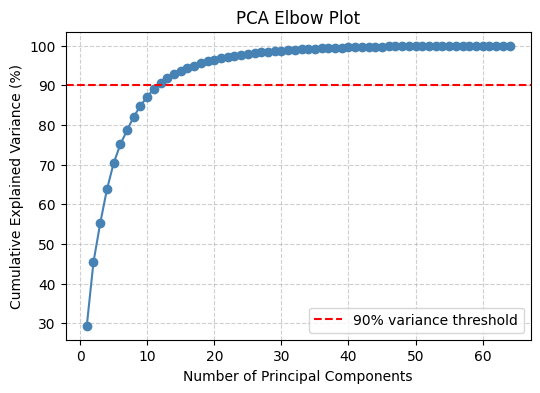

In [79]:
# Plot elbow plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', color='steelblue')
plt.axhline(90, color='red', linestyle='--', label='90% variance threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Elbow Plot')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
# 12 components

In [85]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_bal, y_bal = ros.fit_resample(X_pca, y)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

clf = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        18
           1       0.56      0.56      0.56        18

    accuracy                           0.56        36
   macro avg       0.56      0.56      0.56        36
weighted avg       0.56      0.56      0.56        36



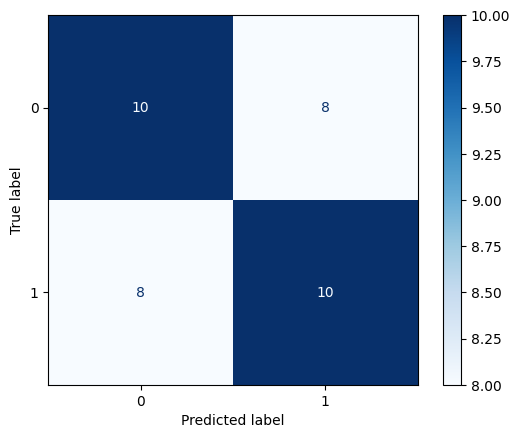

In [87]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot(cmap='Blues')